In [1]:
import turicreate as tc

## Reading the song list dataset

In [2]:
sf=tc.SFrame("song_data.sframe")

In [3]:
sf

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


### Checking number of unique users and songs in the system.

In [15]:
len(sf['user_id'].unique())

66346

In [17]:
len(sf['song'].unique())

9952

In [18]:
users=sf['user_id'].unique()

## Splitting dataset into test, train data

In [19]:
train_data,test_data=sf.random_split(0.8,seed=0)

## Model 1: simple popularity model

In [20]:
model1=tc.popularity_recommender.create(train_data,user_id='user_id',item_id='song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 1.40139s

893580 observations to process; with 9952 unique items.

### Model 1: Recommendation for 1st user 

In [24]:
model1.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,4754.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4227.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,3781.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3527.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3148.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2532.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2521.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Drop The World - LilWayne / Eminem ...,2053.0,10


### Model 1: Recommendation for 2nd user 

In [26]:
model1.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


#### Here, we can clearly see that both the users get recommended the same songs, since its a popularity model, and will always judge products using popularity in general.

In [36]:
model1.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,Tenuousness - Andrew Bird,1.0,1
With Or Without You - U2,Heiterkeit - PeterLicht,1.0,2
With Or Without You - U2,Tú - Shakira,1.0,3
With Or Without You - U2,Silence - Delerium feat.Sarah McLachlan ...,1.0,4
With Or Without You - U2,Trouble - Coldplay,1.0,5
With Or Without You - U2,Genom tunna tyger -Markus Krunegård ...,1.0,6
With Or Without You - U2,All Men Are Liars - NickLowe ...,0.9999999514622506,7
With Or Without You - U2,On Melancholy Hill -Gorillaz ...,0.9999999514622506,8
With Or Without You - U2,Mykonos - Fleet Foxes,0.9999999514622506,9
With Or Without You - U2,You Never Miss The WaterUntil The Well Runs D ...,0.9999999514622506,10


In [37]:
model1.get_similar_items(['Sehr kosmisch - Harmonia'])

song,similar,score,rank
Sehr kosmisch - Harmonia,Undo - Björk,0.987664726110675,1
Sehr kosmisch - Harmonia,You're The One - DwightYoakam ...,0.9579512347865481,2
Sehr kosmisch - Harmonia,Dog Days Are Over (RadioEdit) - Florence + The ...,0.9441865598639131,3
Sehr kosmisch - Harmonia,Revelry - Kings Of Leon,0.9331322527956332,4
Sehr kosmisch - Harmonia,Horn Concerto No. 4 in Eflat K495: II. Romance ...,0.8872908646559353,5
Sehr kosmisch - Harmonia,Secrets - OneRepublic,0.8854437869822485,6
Sehr kosmisch - Harmonia,Hey_ Soul Sister - Train,0.781894268383002,7
Sehr kosmisch - Harmonia,Fireflies - CharttraxxKaraoke ...,0.7807115914816883,8
Sehr kosmisch - Harmonia,Tive Sim - Cartola,0.7785350449311071,9
Sehr kosmisch - Harmonia,Drop The World - LilWayne / Eminem ...,0.6759763313609468,10


#### Here, it is clear that the similar items are based on descending order scores, where the starting point is the mentioned item.

## Model 2: personalized recommender model

In [27]:
model2=tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='song') 

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 1.38001s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.955ms                        | 1.5        |

| 40.163ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 756.565ms                           | 0                | 4               |

| 3.00s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 4.09671s

### Model 2: Recommendation for 1st User

In [28]:
model2.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.019450453611520622,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.014473731701190654,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.014286596041459303,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Marry Me - Train,0.014133471709031325,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.013591665488023024,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,0.013398789442502536,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Te Hacen Falta Vitaminas- Soda Stereo ...,0.01293028317964994,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,0.012777828253232516,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Y solo se me ocurreamarte (Unplugged) - ...,0.012341127945826603,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,No Dejes Que... -Caifanes ...,0.012104249917543851,10


### Model 2: Recommendation for 2nd User

In [29]:
model2.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [32]:
model2.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [33]:
model2.get_similar_items(['Sehr kosmisch - Harmonia'])

song,similar,score,rank
Sehr kosmisch - Harmonia,Secrets - OneRepublic,0.18081289529800415,1
Sehr kosmisch - Harmonia,Dog Days Are Over (RadioEdit) - Florence + The ...,0.17366361618041992,2
Sehr kosmisch - Harmonia,Hey_ Soul Sister - Train,0.14654088020324707,3
Sehr kosmisch - Harmonia,Fireflies - CharttraxxKaraoke ...,0.14361953735351562,4
Sehr kosmisch - Harmonia,OMG - Usher featuringwill.i.am ...,0.11647772789001465,5
Sehr kosmisch - Harmonia,Marry Me - Train,0.11223626136779785,6
Sehr kosmisch - Harmonia,Undo - Björk,0.10372370481491089,7
Sehr kosmisch - Harmonia,Revelry - Kings Of Leon,0.09075343608856201,8
Sehr kosmisch - Harmonia,You're The One - DwightYoakam ...,0.0897599458694458,9
Sehr kosmisch - Harmonia,Drop The World - LilWayne / Eminem ...,0.08929431438446045,10


#### So, it can be seen that, the similar items recommended are based on similarity traits and jaccard distance calculation.

### Comparison of both models based on Precision_recall scores.

In [45]:
%matplotlib inline
z=tc.recommender.util.compare_models(test_data, [model1,model2], metric='precision_recall')

PROGRESS: Evaluate model M0


recommendations finished on 1000/58628 queries. users per second: 9175.41

recommendations finished on 2000/58628 queries. users per second: 10639.3

recommendations finished on 3000/58628 queries. users per second: 11349.2

recommendations finished on 4000/58628 queries. users per second: 11257.2

recommendations finished on 5000/58628 queries. users per second: 11153.2

recommendations finished on 6000/58628 queries. users per second: 11077.4

recommendations finished on 7000/58628 queries. users per second: 11023.4

recommendations finished on 8000/58628 queries. users per second: 10815.3

recommendations finished on 9000/58628 queries. users per second: 10791.2

recommendations finished on 10000/58628 queries. users per second: 10709.9

recommendations finished on 11000/58628 queries. users per second: 10450.4

recommendations finished on 12000/58628 queries. users per second: 10462.8

recommendations finished on 13000/58628 queries. users per second: 10552.6

recommendations finished on 14000/58628 queries. users per second: 10539.6

recommendations finished on 15000/58628 queries. users per second: 10733.2

recommendations finished on 16000/58628 queries. users per second: 10691.3

recommendations finished on 17000/58628 queries. users per second: 10568.9

recommendations finished on 18000/58628 queries. users per second: 10563.3

recommendations finished on 19000/58628 queries. users per second: 10581.7

recommendations finished on 20000/58628 queries. users per second: 10598.2

recommendations finished on 21000/58628 queries. users per second: 10531.8

recommendations finished on 22000/58628 queries. users per second: 10486.8

recommendations finished on 23000/58628 queries. users per second: 10500.1

recommendations finished on 24000/58628 queries. users per second: 10491.1

recommendations finished on 25000/58628 queries. users per second: 10390.6

recommendations finished on 26000/58628 queries. users per second: 10302

recommendations finished on 27000/58628 queries. users per second: 10309.8

recommendations finished on 28000/58628 queries. users per second: 10263

recommendations finished on 29000/58628 queries. users per second: 10163.2

recommendations finished on 30000/58628 queries. users per second: 10096.9

recommendations finished on 31000/58628 queries. users per second: 9957.18

recommendations finished on 32000/58628 queries. users per second: 9951.5

recommendations finished on 33000/58628 queries. users per second: 9987.34

recommendations finished on 34000/58628 queries. users per second: 10020.3

recommendations finished on 35000/58628 queries. users per second: 10046.8

recommendations finished on 36000/58628 queries. users per second: 10090.1

recommendations finished on 37000/58628 queries. users per second: 10109.9

recommendations finished on 38000/58628 queries. users per second: 10114.4

recommendations finished on 39000/58628 queries. users per second: 10125.4

recommendations finished on 40000/58628 queries. users per second: 10182.1

recommendations finished on 41000/58628 queries. users per second: 10204.1

recommendations finished on 42000/58628 queries. users per second: 10211.8

recommendations finished on 43000/58628 queries. users per second: 10190.2

recommendations finished on 44000/58628 queries. users per second: 10194.9

recommendations finished on 45000/58628 queries. users per second: 10208.4

recommendations finished on 46000/58628 queries. users per second: 10212

recommendations finished on 47000/58628 queries. users per second: 10239

recommendations finished on 48000/58628 queries. users per second: 10263.2

recommendations finished on 49000/58628 queries. users per second: 10278.8

recommendations finished on 50000/58628 queries. users per second: 10257.3

recommendations finished on 51000/58628 queries. users per second: 10261.5

recommendations finished on 52000/58628 queries. users per second: 10283.4

recommendations finished on 53000/58628 queries. users per second: 10254.6

recommendations finished on 54000/58628 queries. users per second: 10203.6

recommendations finished on 55000/58628 queries. users per second: 10145

recommendations finished on 56000/58628 queries. users per second: 10165

recommendations finished on 57000/58628 queries. users per second: 10154.7

recommendations finished on 58000/58628 queries. users per second: 10130.2


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.028331172818448522 | 0.007492220445288921 |
|   2    | 0.027222487548611597 | 0.014795267425410092 |
|   3    | 0.02478337995496995  | 0.019985345559090182 |
|   4    | 0.02300521934911646  | 0.024405713410891566 |
|   5    | 0.021044552091151945 | 0.027760064050806908 |
|   6    | 0.020018876077414646 | 0.03181861488300837  |
|   7    | 0.018923186385831927 | 0.03513253370693233  |
|   8    | 0.018005475199563314 | 0.03821129823116687  |
|   9    | 0.01712113286787387  | 0.040819084180103396 |
|   10   | 0.016410247663233377 | 0.04350596069006786  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/58628 queries. users per second: 7839.63

recommendations finished on 2000/58628 queries. users per second: 9577.86

recommendations finished on 3000/58628 queries. users per second: 10081.2

recommendations finished on 4000/58628 queries. users per second: 10383.5

recommendations finished on 5000/58628 queries. users per second: 10100.1

recommendations finished on 6000/58628 queries. users per second: 9565.88

recommendations finished on 7000/58628 queries. users per second: 9766.62

recommendations finished on 8000/58628 queries. users per second: 9926.51

recommendations finished on 9000/58628 queries. users per second: 9963.73

recommendations finished on 10000/58628 queries. users per second: 10118

recommendations finished on 11000/58628 queries. users per second: 10011.6

recommendations finished on 12000/58628 queries. users per second: 10175.7

recommendations finished on 13000/58628 queries. users per second: 10203.8

recommendations finished on 14000/58628 queries. users per second: 10175.9

recommendations finished on 15000/58628 queries. users per second: 10198.5

recommendations finished on 16000/58628 queries. users per second: 10069.9

recommendations finished on 17000/58628 queries. users per second: 10045.1

recommendations finished on 18000/58628 queries. users per second: 10134.8

recommendations finished on 19000/58628 queries. users per second: 10165

recommendations finished on 20000/58628 queries. users per second: 10195.9

recommendations finished on 21000/58628 queries. users per second: 10146.7

recommendations finished on 22000/58628 queries. users per second: 10187.4

recommendations finished on 23000/58628 queries. users per second: 10227.4

recommendations finished on 24000/58628 queries. users per second: 10221.9

recommendations finished on 25000/58628 queries. users per second: 10215.2

recommendations finished on 26000/58628 queries. users per second: 10208.3

recommendations finished on 27000/58628 queries. users per second: 10214.9

recommendations finished on 28000/58628 queries. users per second: 10198.3

recommendations finished on 29000/58628 queries. users per second: 10159.3

recommendations finished on 30000/58628 queries. users per second: 10096.3

recommendations finished on 31000/58628 queries. users per second: 10095.7

recommendations finished on 32000/58628 queries. users per second: 10009.8

recommendations finished on 33000/58628 queries. users per second: 10053.8

recommendations finished on 34000/58628 queries. users per second: 10016.8

recommendations finished on 35000/58628 queries. users per second: 10005.4

recommendations finished on 36000/58628 queries. users per second: 10014.1

recommendations finished on 37000/58628 queries. users per second: 9976.62

recommendations finished on 38000/58628 queries. users per second: 9962.32

recommendations finished on 39000/58628 queries. users per second: 9929.33

recommendations finished on 40000/58628 queries. users per second: 9912.35

recommendations finished on 41000/58628 queries. users per second: 9875.7

recommendations finished on 42000/58628 queries. users per second: 9797.18

recommendations finished on 43000/58628 queries. users per second: 9751.89

recommendations finished on 44000/58628 queries. users per second: 9747.36

recommendations finished on 45000/58628 queries. users per second: 9738.47

recommendations finished on 46000/58628 queries. users per second: 9741.59

recommendations finished on 47000/58628 queries. users per second: 9726.66

recommendations finished on 48000/58628 queries. users per second: 9695.65

recommendations finished on 49000/58628 queries. users per second: 9566.79

recommendations finished on 50000/58628 queries. users per second: 9485.89

recommendations finished on 51000/58628 queries. users per second: 9414.5

recommendations finished on 52000/58628 queries. users per second: 9353.26

recommendations finished on 53000/58628 queries. users per second: 9361.56

recommendations finished on 54000/58628 queries. users per second: 9378.42

recommendations finished on 55000/58628 queries. users per second: 9375.51

recommendations finished on 56000/58628 queries. users per second: 9376.82

recommendations finished on 57000/58628 queries. users per second: 9364.52

recommendations finished on 58000/58628 queries. users per second: 9326.6


Precision and recall summary statistics by cutoff
+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.19088149007300298 | 0.05957278356477064 |
|   2    | 0.16126253667189794 | 0.09581953987871733 |
|   3    | 0.14067794682859142 | 0.12177237338517138 |
|   4    |  0.1258016647335745 | 0.14291355210362458 |
|   5    | 0.11406836323940674 | 0.15980894562790918 |
|   6    | 0.10460303381774327 | 0.17480544429751183 |
|   7    | 0.09700143276250267 | 0.18816176042118876 |
|   8    |  0.0906542095926859 | 0.20015828931691645 |
|   9    | 0.08533086200753516 | 0.21110066704605518 |
|   10   |  0.0806577062154604 | 0.22091121742679812 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



### Plotting the Precision-Recall scores of both models

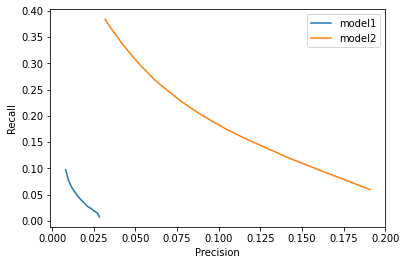

In [57]:
import matplotlib.pyplot as plt
x=z[0]['precision_recall_overall']
y=z[1]['precision_recall_overall']
plt.plot(x['precision'],x['recall'],label='model1')
plt.plot(y['precision'],y['recall'],label='model2')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

#### Here we can see that the personalized model ( model 2 ) has a better performance than popularity model ( model 1 ) in terms of area covered by the graph.

## Finding no. of unique users lisgtening to particular artist's songs

In [81]:
KW=sf[sf['artist']=='Kanye West']
KW['user_id'].unique().value_counts()

value,count
72b73c8720fd92aca5af8251a88aa94520b42203 ...,1
0cc8342f12ed7ff0e2db54055295d7ab1f9cf667 ...,1
08aeabee940314403018ddfc43d45969c523b60e ...,1
dafceeb18a890e9fa3714378b8a9c5523d045135 ...,1
654e3fc91be651baa6873470b797b8a16dcf40d3 ...,1
db37704f0dc3a11f9cb8320b252009c81c47a7db ...,1
d8461950c8b10929fb5beec3d319ebd48a991b98 ...,1
2adb97ee2781d1526c134725845963243f64f017 ...,1
f250b34ae137026061d01d18502df05eac9128de ...,1
5f3337bb7645c02429c477948e9c468fcbc9c335 ...,1


In [82]:
FF=sf[sf['artist']=='Foo Fighters']
FF['user_id'].unique().value_counts()

value,count
655349620dab7d0f562052e8c590e5a71811c33b ...,1
46b53c1cbf347e10c154f9c73e0be5d72f4432ce ...,1
d70f572c3819cd696e9a1e406130c1505d58a6f8 ...,1
1aa96a001199caf562743cc3e362cab855e45423 ...,1
57edbf6f4834a5682e0a7ac1a0cf2cc1a507595c ...,1
c73cc82ed6a8eca616be0b9ed2b789e23d84da33 ...,1
5ead6b737a7c4535e04bdfdffaebdd0a72eeed74 ...,1
ac78f06153ca2b6d1b34f68db99131a76f2a0660 ...,1
2ef72a7276898a37c8d385b21c608ca605882249 ...,1
c84642a28adc2d62d364ca5b3305f3206b47240c ...,1


In [83]:
TS=sf[sf['artist']=='Taylor Swift']
TS['user_id'].unique().value_counts()

value,count
5dab3229863baac1df02a9b3bfd2817589c01dc7 ...,1
c4ad8975f3e891cb91396a46c4ff4915534ea1d6 ...,1
fb25cf1840420e6e2183ddf19fd2f93c4975cd5f ...,1
f618308c6124c88a2e0f6483103e89a4862f2d9a ...,1
a736cddcf88b1753c7825ba36f4aafa489ac5ec1 ...,1
267a1787cb25347da2131b6c8c4dc2fd66aa10aa ...,1
46474cad92820165fa5a866b708df6e26f1e8eda ...,1
5018e5b85c9f04601e52f282cf4266b87db0809d ...,1
27a271f813ad1d747dcbe9f9caa50869158d9d1f ...,1
a9de3bccd67caebe47c5d578561bc0dfa72233ae ...,1


In [84]:
LG=sf[sf['artist']=='Lady GaGa']
LG['user_id'].unique().value_counts()

value,count
a418f1e6450d7964027803db23e1dd6667944c5c ...,1
a39aac5054a5d3d5fc4654ffd7b6e3cc695290bd ...,1
4bf5bae2ff5638da0b3f36fd8dbecfc974cc68a2 ...,1
1e38891a3f2ea5820c58c445a53abc35bbf97822 ...,1
94813249d01328459bd594458fb912267323ce97 ...,1
e67ea726df3cb23b7250a6f191f30d2a263ffacb ...,1
439dd9e3df0735eb37cf7158dd640a6d16f336af ...,1
28fc7f67ac641c5720a1216c30fe8d64f6b8a413 ...,1
25cdb3613cc29ee6aa85c21e361fdbfd71afec96 ...,1
cf720c42c2b86c4413a397d13284c931aca176c3 ...,1


### Finding the most popular and least popular artist

In [91]:
z=sf.groupby(key_column_names='artist', operations={'total_count': tc.aggregate.SUM('listen_count')}).sort('total_count',ascending=False)
z

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184


In [90]:
z.head(1), z.tail(1)

(Columns:
 	artist	str
 	total_count	int
 
 Rows: 1
 
 Data:
 +---------------+-------------+
 |     artist    | total_count |
 +---------------+-------------+
 | Kings Of Leon |    43218    |
 +---------------+-------------+
 [1 rows x 2 columns],
 Columns:
 	artist	str
 	total_count	int
 
 Rows: 1
 
 Data:
 +-----------------+-------------+
 |      artist     | total_count |
 +-----------------+-------------+
 | William Tabbert |      14     |
 +-----------------+-------------+
 [1 rows x 2 columns])

### Using groupby-aggregate to find the most recommended songs

In [92]:
subset_test_users = test_data['user_id'].unique()[0:10000]

In [93]:
model2.recommend(subset_test_users,k=1)

recommendations finished on 1000/10000 queries. users per second: 10242

recommendations finished on 2000/10000 queries. users per second: 12093.3

recommendations finished on 3000/10000 queries. users per second: 12888.8

recommendations finished on 4000/10000 queries. users per second: 12751.6

recommendations finished on 5000/10000 queries. users per second: 13028.5

recommendations finished on 6000/10000 queries. users per second: 13317.8

recommendations finished on 7000/10000 queries. users per second: 13147.3

recommendations finished on 8000/10000 queries. users per second: 13047.3

recommendations finished on 9000/10000 queries. users per second: 12787.6

recommendations finished on 10000/10000 queries. users per second: 12624.7

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Cuando Pase El Temblor -Soda Stereo ...,0.019450453611520622,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
f6c596a519698c97f1591ad89f540d76f6a04f1a ...,Hey_ Soul Sister - Train,0.023892953991889954,1
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.01702657767704555,1
3a7111f4cdf3c5a85fd4053e3cc2333562e1e0cb ...,Heartbreak Warfare - JohnMayer ...,0.029841651519139607,1
532e98155cbfd1e1a474a28ed96e59e50f7c5baf ...,Jive Talkin' (AlbumVersion) - Bee Gees ...,0.011828865323747908,1
ee43b175ed753b2e2bce806c903d4661ad351a91 ...,Ricordati Di Noi -Valerio Scanu ...,0.03051712115605672,1
e372c27f6cb071518ae500589ae02c126954c148 ...,Fall Out - The Police,0.08196720480918884,1
83b1428917b47a6b130ed471b09033820be78a8c ...,Clocks - Coldplay,0.04285883903503418,1
39487deef9345b1e22881245cabf4e7c53b6cf6e ...,Black Mirror - ArcadeFire ...,0.04177376857170692,1


In [99]:
x=sf.groupby(key_column_names='song', operations={'count': tc.aggregate.COUNT()}).sort('count',ascending=False)
x

song,count
Sehr kosmisch - Harmonia,5970
Undo - Björk,5281
You're The One - DwightYoakam ...,4806
Dog Days Are Over (RadioEdit) - Florence + The ...,4536
Revelry - Kings Of Leon,4339
Horn Concerto No. 4 in Eflat K495: II. Romance ...,3949
Secrets - OneRepublic,3916
Tive Sim - Cartola,3185
Fireflies - CharttraxxKaraoke ...,3171
Hey_ Soul Sister - Train,3132


In [100]:
x.head(1), x.tail(1)

(Columns:
 	song	str
 	count	int
 
 Rows: 1
 
 Data:
 +--------------------------+-------+
 |           song           | count |
 +--------------------------+-------+
 | Sehr kosmisch - Harmonia |  5970 |
 +--------------------------+-------+
 [1 rows x 2 columns],
 Columns:
 	song	str
 	count	int
 
 Rows: 1
 
 Data:
 +-------------------------------+-------+
 |              song             | count |
 +-------------------------------+-------+
 | Younger Than Springtime - ... |   12  |
 +-------------------------------+-------+
 [1 rows x 2 columns])